# **Cargar dataset**

In [ ]:
from google.colab import drive

#Cargar los datos desde el drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Cargar el archivo CSV, en colab en la ruta hay que añadir /content/
file_path = '/content/drive/MyDrive/TFM - Grupo 10 - MBDDS IL3 2024/datos/viajes_interurbano.csv'

# Carga del dataset
#df_viaje = pd.read_csv(file_path)
df = pd.read_csv(file_path)

print(df.head())

# Cargar el archivo CSV, en colab en la ruta hay que añadir /content/
file_path = '/content/drive/MyDrive/TFM - Grupo 10 - MBDDS IL3 2024/datos/datos_usuarios.csv'

# Carga del dataset
df_usuario = pd.read_csv(file_path)

print(df_usuario.head())

# URL del dataset
file_path = '/content/drive/MyDrive/TFM - Grupo 10 - MBDDS IL3 2024/datos/estaciones_centro.csv'

# Carga del dataset
df_estaciones = pd.read_csv(file_path)

print(df_estaciones.head())

# URL del dataset
file_path = '/content/drive/MyDrive/TFM - Grupo 10 - MBDDS IL3 2024/datos/centroids_hc.csv'

# Carga del dataset
df_places = pd.read_csv(file_path)

print(df_places.head())

   Viaje_Id  Usuario_Id Genero  Año_de_nacimiento     Inicio_del_viaje  \
0  31789290     1732214      M               1969  2023-12-31 23:53:56   
1  31789289     1350606      M               1983  2023-12-31 23:51:09   
2  31789288      546144      M               1987  2023-12-31 23:51:12   
3  31789284     1534764      M               1987  2023-12-31 23:48:16   
4  31789283      104335      M               1986  2023-12-31 23:42:15   

         Fin_del_viaje  Origen_Id  Destino_Id  Edad         Duración  ...  \
0  2024-01-01 00:13:28        272         379    54  0 days 00:19:32  ...   
1  2024-01-01 00:03:59        160          50    40  0 days 00:12:50  ...   
2  2023-12-31 23:58:36         50         256    36  0 days 00:07:24  ...   
3  2024-01-01 00:10:13         12          12    36  0 days 00:21:57  ...   
4  2023-12-31 23:48:46         51          50    37  0 days 00:06:31  ...   

   latitude_origen longitude_origen  cluster_hc_origen  altitude_origen  \
0        20.68910

# Subclustericación del cluster Centro Urbano

## Optimizar con Método del Codo (Elbow Method)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

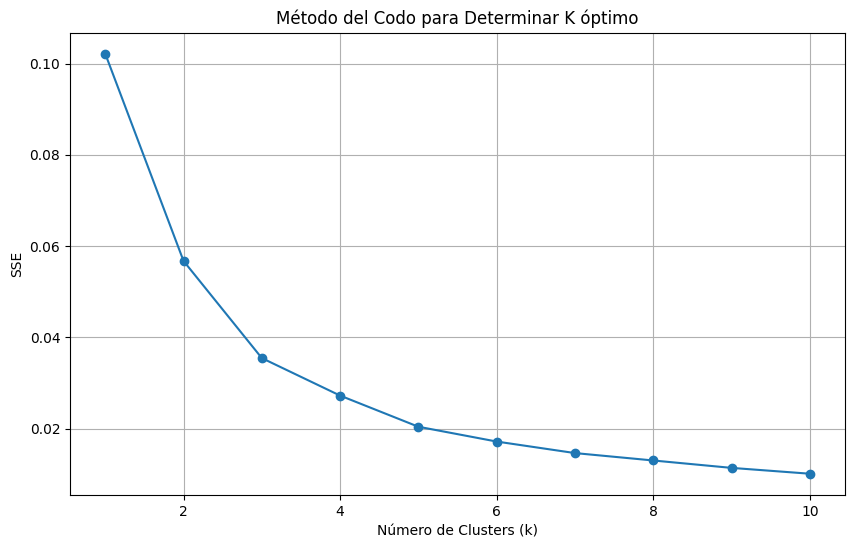

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Preparar los datos
features = df_estaciones[['latitude', 'longitude']]  # Asegúrate de incluir las características que necesites

# Calcular la suma de las distancias al cuadrado para diferentes números de clusters
sse = []
for k in range(1, 11):  # Probando k de 1 a 10
    kmeans = KMeans(n_clusters=k, random_state=0).fit(features)
    sse.append(kmeans.inertia_)

# Graficar SSE (suma de cuadrados dentro de los clusters) en función de k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Método del Codo para Determinar K óptimo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('SSE')
plt.grid(True)
plt.show()

Observamos un "codo" menos definido pero notorio alrededor de 𝑘=3. Y desde allí ya van disminuyendo el rendmimiento en subir números de k.

## **Análisis de Silueta**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

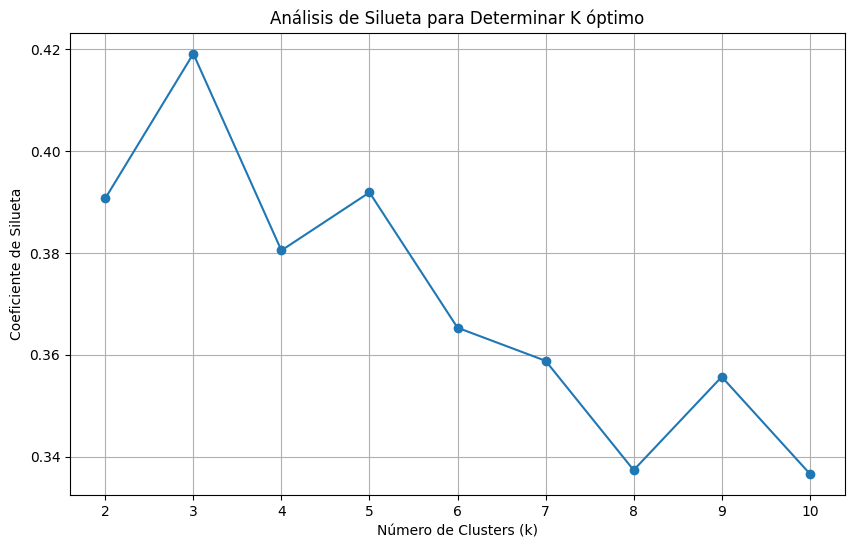

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):  # Silhouette no se puede calcular con k = 1
    kmeans = KMeans(n_clusters=k, random_state=0).fit(features)
    score = silhouette_score(features, kmeans.labels_)
    silhouette_scores.append(score)

# Graficar los scores de silueta para diferentes valores de k
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Análisis de Silueta para Determinar K óptimo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente de Silueta')
plt.grid(True)
plt.show()


El valor más alto del coeficiente de silueta ocurre en
**𝑘=3**, lo que indica que los clusters son relativamente densos y bien separados a este nivel. Sin embargo, hay una disminución constante después de
𝑘=3, lo que sugiere que la cohesión y la separación entre los clusters se deterioran a medida que 𝑘 aumenta.

## Clustering Jerárquico


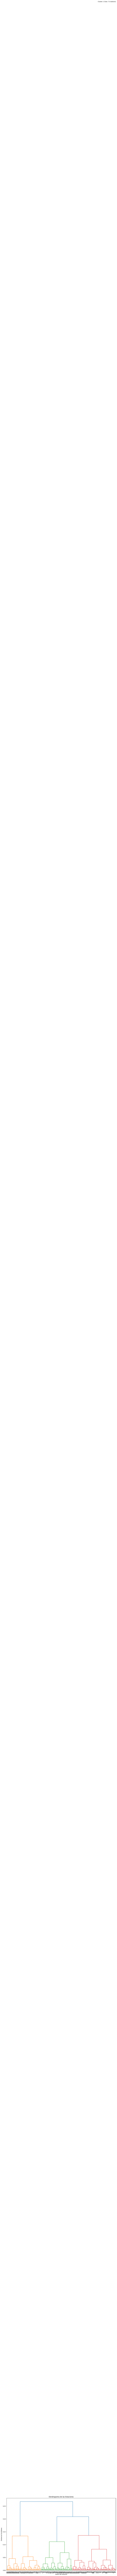

In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Extraer coordenadas desde dataframe df_nom.
coords = df_estaciones[['latitude', 'longitude']].to_numpy()

# Generar el linkage para el dendrograma
linked = linkage(coords, 'ward')

# Crear una figura grande para mejor visualización
plt.figure(figsize=(15, 10))

# Generar el dendrograma
dendro = dendrogram(linked, labels=df_estaciones.index.to_numpy(), leaf_rotation=90, leaf_font_size=8)

# Añadir anotaciones y cajas
ax = plt.gca()
bounds = ax.get_xbound()

# Dibujar una caja alrededor de un cluster específico
plt.plot([bounds[1], bounds[1]], [0, 10], '--', c='black')
plt.text(bounds[1], 10, 'Cluster 2 (Size: 73 stations)', va='top', ha='right', fontsize=10, backgroundcolor='white')

# Mostrar el dendrograma
plt.title('Dendrograma de las Estaciones')
plt.xlabel('Índice de Estación')
plt.ylabel('Distancia Euclidiana')
plt.show()


Como el resultado de optimización anterior el dendrograma ha dividido en 3 clusters.


## Personalización de los nombres y colores de cada cluster

In [ ]:
# Nombres y colores personalizados para cada cluster
# Nombres personalizados para cada cluster
cluster_names = {
    0: "Suroeste",
    1: "Sureste",
    2: "Norte"
}
cluster_colors = {0: "#2ca02c", 1: "#8960b0", 2: "#d62728"}  # Colores en hexadecimal

Número de clusters formados: 3


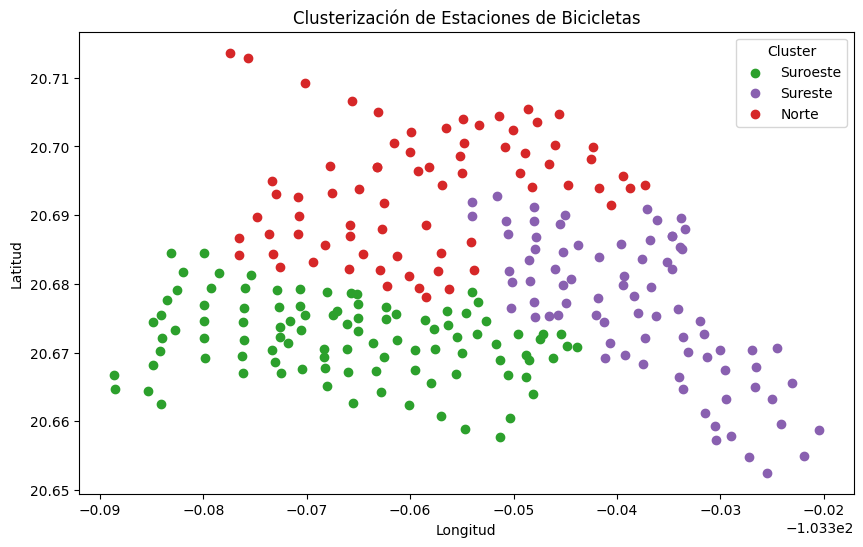

   cluster_hc   latitude   longitude
0           0  20.671964 -103.366198
1           1  20.676495 -103.338076
2           2  20.693606 -103.359128


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering

# Extraer coordenadas desde dataframe df_estaciones
coords = df_estaciones[['latitude', 'longitude']].to_numpy()

# Configurar AgglomerativeClustering con un umbral de distancia para el corte
hc = AgglomerativeClustering(n_clusters=None, distance_threshold=0.15, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(coords)

# Número de clusters resultantes
num_clusters_hc = np.max(hc_labels) + 1
print(f'Número de clusters formados: {num_clusters_hc}')

# Añadir las etiquetas de clusters al DataFrame original
df_estaciones['cluster_hc'] = hc_labels

# Mapear los colores a cada punto según su cluster
colors = [cluster_colors[label] for label in hc_labels]

# Visualizar los resultados con colores personalizados
plt.figure(figsize=(10, 6))
for cluster_id in cluster_names:
    cluster_data = df_estaciones[df_estaciones['cluster_hc'] == cluster_id]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], color=cluster_colors[cluster_id], label=cluster_names[cluster_id], marker='o')
plt.title('Clusterización de Estaciones de Bicicletas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Cluster')
plt.show()

# Si es necesario, calcular los centroides de cada cluster
centroids_hc = df_estaciones.groupby('cluster_hc')[['latitude', 'longitude']].mean().reset_index()
print(centroids_hc)




## Tamaño de cada cluster

In [ ]:
# Vamos a usar 'status' para ello hay que convertirlo de categórico a numérico
df_estaciones['status_numeric'] = df_estaciones['status'].astype('category').cat.codes

# Cambiar la codificación de 'status_numeric' para que 'IN_SERVICE' sea 1 y 'NOT_IN_SERVICE' sea 0
df_estaciones['status_numeric'] = df_estaciones['status'].apply(lambda x: 1 if x == 'IN_SERVICE' else 0)

# Verificar nuevamente los valores únicos para asegurarse de que el cambio se ha realizado correctamente
print(df_estaciones[['status', 'status_numeric']].drop_duplicates())

# Contar las estaciones en servicio y fuera de servicio por cluster
in_service_counts = df_estaciones[df_estaciones['status_numeric'] == 1].groupby('cluster_hc').size()
out_of_service_counts = df_estaciones[df_estaciones['status_numeric'] == 0].groupby('cluster_hc').size()

# Crear un DataFrame para visualizar las cuentas
cluster_service_counts = pd.DataFrame({
    'In Service': in_service_counts,
    'Out of Service': out_of_service_counts
}).fillna(0)  # Asegurar que no hay NaN

print(cluster_service_counts)


            status  status_numeric
0       IN_SERVICE               1
19  NOT_IN_SERVICE               0
            In Service  Out of Service
cluster_hc                            
0                  100               1
1                   78               2
2                   70               2


In [ ]:
# Asignamos que 'status_numeric' 1 representa 'In Service' y 0 'Out of Service'
# Contar las estaciones en servicio y fuera de servicio por cluster
in_service_counts = df_estaciones[df_estaciones['status_numeric'] == 1].groupby('cluster_hc').size()
out_of_service_counts = df_estaciones[df_estaciones['status_numeric'] == 0].groupby('cluster_hc').size()

# Crear un DataFrame para las visualizaciones
cluster_service_distribution = pd.DataFrame({
    'In Service': in_service_counts,
    'Out of Service': out_of_service_counts
}).fillna(0)  # Asegurarse de que todos los valores NaN sean tratados como 0


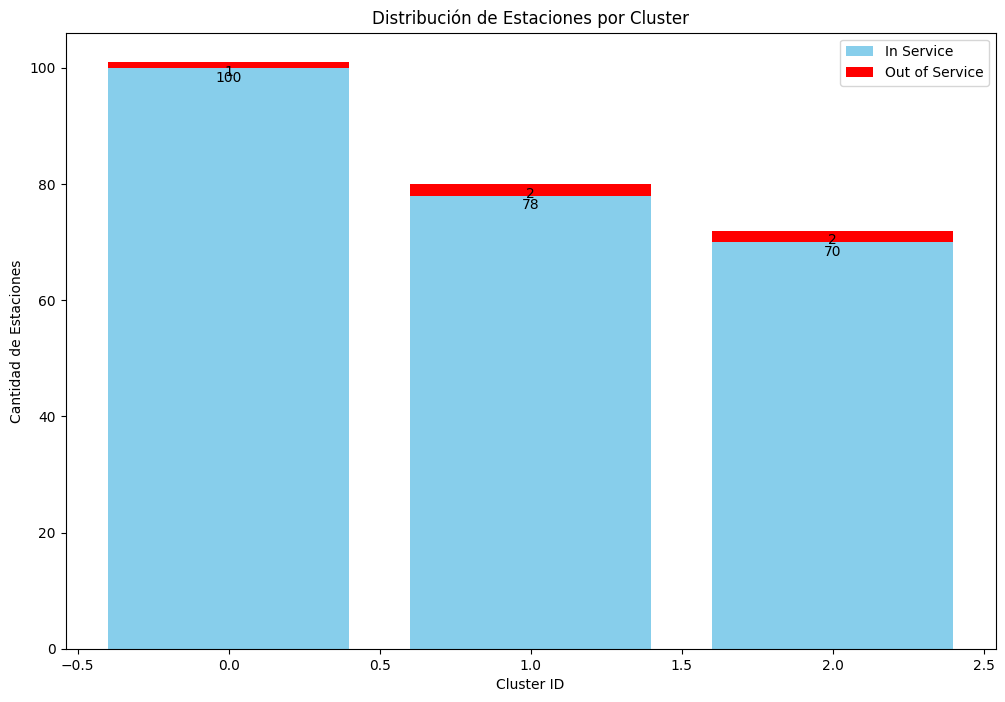

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

# Barras para estaciones en servicio
bars1 = ax.bar(cluster_service_distribution.index, cluster_service_distribution['In Service'], color='skyblue', label='In Service')

# Barras para estaciones fuera de servicio
bars2 = ax.bar(cluster_service_distribution.index, cluster_service_distribution['Out of Service'], bottom=cluster_service_distribution['In Service'], color='red', label='Out of Service')

ax.set_xlabel('Cluster ID')
ax.set_ylabel('Cantidad de Estaciones')
ax.set_title('Distribución de Estaciones por Cluster')
ax.legend()

# Etiquetas en las barras
def add_labels(bars, data, is_bottom=False):
    for bar, value in zip(bars, data):
        y_pos = bar.get_height()
        if is_bottom:
            y_pos += bar.get_y()  # Sumar la altura de la base para las barras "Out of Service"
        ax.annotate('{}'.format(value),
                    xy=(bar.get_x() + bar.get_width() / 2, y_pos),
                    xytext=(0, -12),  # 3 puntos de desplazamiento vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1, cluster_service_distribution['In Service'])
add_labels(bars2, cluster_service_distribution['Out of Service'], is_bottom=True)

plt.show()


In [ ]:
import folium

# Crear un mapa centrado en las coordenadas promedio de las estaciones
map_center = df_estaciones[['latitude', 'longitude']].mean().values
map_gdl = folium.Map(location=map_center, zoom_start=13)

# Definir colores para cada cluster
colors = ["green", "purple", "red", "orange"]  # Colores en hexadecimal

# Añadir marcadores para cada estación
for _, row in df_estaciones.iterrows():
    cluster_id = row['cluster_hc']
    popup_info = f"Name: {row['name']}<br>Cluster: {cluster_id}<br>Status: {'In Service' if row['status_numeric'] == 1 else 'Out of Service'}"
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=popup_info,
        icon=folium.Icon(color=colors[cluster_id % len(colors)], icon='info-sign')
    ).add_to(map_gdl)

# Mostrar el mapa
map_gdl



## Preparar dataframe para movimientos entre cluster

In [ ]:
#df = df_viaje.merge(df_estaciones[['id','latitude','longitude','cluster_hc','altitude']], left_on='Origen_Id', right_on='id', how='left', suffixes=('', '_origen'))
#df = df.merge(df_estaciones[['id','latitude','longitude','cluster_hc','altitude']], left_on='Destino_Id', right_on='id', how='left', suffixes=('_origen', '_destino'))

def calcular_distancia(lat1, lon1, lat2, lon2):
    # Aproximadamente en kilómetros
    R = 6371.0
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    distance = R * c
    return distance

#df['distancia'] = df.apply(lambda row: calcular_distancia(row['latitude_origen'], row['longitude_origen'], row['latitude_destino'], row['longitude_destino']), axis=1)



In [ ]:
# Lista de columnas a conservar
print(df.head())

#df.to_csv('/content/drive/MyDrive/TFM - Grupo 10 - MBDDS IL3 2024/datos/viajes_interurbano.csv', index=False)

   Viaje_Id  Usuario_Id Genero  Año_de_nacimiento    Inicio_del_viaje  \
0  31789290     1732214      M               1969 2023-12-31 23:53:56   
1  31789289     1350606      M               1983 2023-12-31 23:51:09   
2  31789288      546144      M               1987 2023-12-31 23:51:12   
3  31789284     1534764      M               1987 2023-12-31 23:48:16   
4  31789283      104335      M               1986 2023-12-31 23:42:15   

        Fin_del_viaje  Origen_Id  Destino_Id  Edad         Duración  ...  \
0 2024-01-01 00:13:28        272         379    54  0 days 00:19:32  ...   
1 2024-01-01 00:03:59        160          50    40  0 days 00:12:50  ...   
2 2023-12-31 23:58:36         50         256    36  0 days 00:07:24  ...   
3 2024-01-01 00:10:13         12          12    36  0 days 00:21:57  ...   
4 2023-12-31 23:48:46         51          50    37  0 days 00:06:31  ...   

   cluster_hc_origen altitude_origen  id_destino  latitude_destino  \
0                  1     1545.2816

# Movimientos entre clusters

In [ ]:
movimientos = df.groupby(['cluster_hc_origen', 'cluster_hc_destino']).size().reset_index(name='Cantidad')

# Ver los primeros registros para verificar
print(movimientos.head())

   cluster_hc_origen  cluster_hc_destino  Cantidad
0                  0                   0   2193081
1                  0                   1    609322
2                  0                   2    530431
3                  1                   0    463522
4                  1                   1    679903


In [ ]:
import plotly.graph_objects as go

# Crear listas de etiquetas (clusters) y flujos
all_clusters = list(set(movimientos['cluster_hc_origen']) | set(movimientos['cluster_hc_destino']))
cluster_indices = {cluster: i for i, cluster in enumerate(all_clusters)}

# Ordenar y renombrar las etiquetas de los nodos
labels = [cluster_names[cluster] for cluster in sorted(all_clusters)]

# Colores de los nodos según el diccionario de colores
node_colors = [cluster_colors[cluster] for cluster in sorted(all_clusters)]

# Definir las fuentes, destinos y valores de los flujos
source_indices = [cluster_indices[cluster] for cluster in movimientos['cluster_hc_origen']]
target_indices = [cluster_indices[cluster] for cluster in movimientos['cluster_hc_destino']]
values = movimientos['Cantidad']

# Colores para los enlaces basados en el cluster de origen
link_colors = [cluster_colors[movimientos.iloc[i]['cluster_hc_origen']] for i in range(len(movimientos))]

# Crear el diagrama de Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=node_colors  # Colores de los nodos
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values,
        color=link_colors  # Colores de los enlaces
    )
)])

# Configuración adicional del layout
fig.update_layout(
    title_text="Movimientos entre Clusters",
    font_size=10,
    font_family="Arial",
    title_font_family="Arial",
    title_font_color="black",
    title_font_size=14
)

# Mostrar el gráfico
fig.show()


In [ ]:
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd

# Calcular el número de viajes entre cada par de clusters
flow_between_clusters = df.groupby(['cluster_hc_origen', 'cluster_hc_destino']).size().reset_index(name='num_viajes')

# Filtrar para incluir solo clusters distintos (evitar líneas que se dibujen a sí mismas)
flow_between_clusters = flow_between_clusters[flow_between_clusters['cluster_hc_origen'] != flow_between_clusters['cluster_hc_destino']]

# Colores diferentes para cada cluster
clusters = centroids_hc['cluster_hc'].unique()
colors = px.colors.qualitative.Plotly[:len(clusters)]

# Crear el gráfico con los centroides
fig = go.Figure()

# Agregar los puntos de los centroides al mapa, uno por cada cluster
for cluster, color in zip(clusters, colors):
    cluster_data = centroids_hc[centroids_hc['cluster_hc'] == cluster]
    fig.add_trace(go.Scattermapbox(
        lat=cluster_data['latitude'],
        lon=cluster_data['longitude'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=10,
            color=cluster_colors[cluster],  # Usar el color personalizado desde el diccionario
            opacity=0.8
        ),
        name=cluster_names[cluster],  # Usar el nombre personalizado
        text=cluster_data.index,
        hoverinfo='text'
    ))

# Agregar líneas entre los clusters basadas en el número de viajes
for _, row in flow_between_clusters.iterrows():
    origin = centroids_hc.loc[centroids_hc['cluster_hc'] == row['cluster_hc_origen']].iloc[0]
    destination = centroids_hc.loc[centroids_hc['cluster_hc'] == row['cluster_hc_destino']].iloc[0]

    # Agregar la línea con un grosor delgado
    fig.add_trace(go.Scattermapbox(
        lat=[origin['latitude'], destination['latitude']],
        lon=[origin['longitude'], destination['longitude']],
        mode='lines+text',
        line=dict(width=1, color='blue'),  # Líneas delgadas
        opacity=0.5,
        name=f"{row['num_viajes']} viajes",
        text=[f"{row['num_viajes']} viajes"],  # Mostrar número de viajes
        textposition='middle right',  # Posición del texto
        hoverinfo='text'
    ))

# Configuración del mapa
fig.update_layout(
    mapbox=dict(
        style="carto-positron",
        center=dict(lat=centroids_hc['latitude'].mean(), lon=centroids_hc['longitude'].mean()),
        zoom=12
    ),
    showlegend=True,
    legend=dict(
        font=dict(size=10),
        itemsizing='constant',
        bgcolor='rgba(255,255,255,0.6)',
    ),
    margin={"r":0,"t":0,"l":0,"b":0}
)

# Mostrar el gráfico
fig.show()


In [ ]:
# Crear nuevas columnas con los nombres de los clusters, sin modificar las columnas originales
df['nom_cluster_hc_origen'] = df['cluster_hc_origen'].map(cluster_names)
df['nom_cluster_hc_destino'] = df['cluster_hc_destino'].map(cluster_names)

Función para mostrar tabla de viajes

In [ ]:
import pandas as pd

def generate_contingency_tables(df, cluster_names, value_column):
    # Crear la tabla de contingencia con nombres
    tabla_viajes_clusters = pd.pivot_table(
        df,
        index='nom_cluster_hc_origen',
        columns='nom_cluster_hc_destino',
        values=value_column,
        aggfunc='count',
        fill_value=0
    )

    # Calcular valores relativos por fila para obtener porcentajes
    tabla_viajes_clusters_percent_row = tabla_viajes_clusters.div(tabla_viajes_clusters.sum(axis=1), axis=0) * 100

    # Calcular valores relativos respecto al total general de viajes
    total_viajes = tabla_viajes_clusters.sum().sum()
    tabla_viajes_clusters_percent_total = tabla_viajes_clusters / total_viajes * 100

    # Aplicar estilo a las tablas
    styled_table = tabla_viajes_clusters.style.format("{:,.0f}").background_gradient(cmap='Blues')
    styled_table_row = tabla_viajes_clusters_percent_row.style.format("{:.2f}%").background_gradient(cmap='Blues')
    styled_table_total = tabla_viajes_clusters_percent_total.style.format("{:.2f}%").background_gradient(cmap='Blues')

    # Mostrar las tablas estilizadas
    display(styled_table)
    display(styled_table_row)
    display(styled_table_total)

# Ejemplo de uso con un DataFrame específico y el diccionario de nombres de clusters
generate_contingency_tables(df, cluster_names, 'Viaje_Id')

nom_cluster_hc_destino,Norte,Sureste,Suroeste
nom_cluster_hc_origen,,,
Norte,"814,539","334,053","488,184"
Sureste,"307,905","679,903","463,522"
Suroeste,"530,431","609,322","2,193,081"


nom_cluster_hc_destino,Norte,Sureste,Suroeste
nom_cluster_hc_origen,,,
Norte,49.76%,20.41%,29.83%
Sureste,21.22%,46.85%,31.94%
Suroeste,15.92%,18.28%,65.80%


nom_cluster_hc_destino,Norte,Sureste,Suroeste
nom_cluster_hc_origen,,,
Norte,12.69%,5.20%,7.60%
Sureste,4.80%,10.59%,7.22%
Suroeste,8.26%,9.49%,34.16%


## Categorizar clusters

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

# Extraer latitudes y longitudes de df_places y centroids_hc
places_coords = df_places[['latitude', 'longitude']].values
centroids_coords = centroids_hc[['latitude', 'longitude']].values

# Calcular la distancia de cada lugar al centroide más cercano y asignar el cluster correspondiente
df_places['cluster_hc'] = pairwise_distances_argmin(places_coords, centroids_coords)

# Mostrar los primeros resultados para verificar
print(df_places.head())

                                                name   latitude   longitude  \
0  Primer Acto De Cesar Moya - Escuela De Artes E...  20.667956 -103.351007   
1                              UI - 16 de septiembre  20.668871 -103.347817   
2                                          Prepa 286  20.666268 -103.348547   
3                                Prepa en 10 semanas  20.666268 -103.348547   
4                                 Gaurrie Estilistas  20.669652 -103.347524   

     type  cluster_hc   lat_rad   lon_rad  distance_to_centroid  
0  school           1  0.360724 -1.803815              1.646616  
1  school           1  0.360740 -1.803760              1.321277  
2  school           1  0.360694 -1.803772              1.574831  
3  school           1  0.360694 -1.803772              1.574831  
4  school           1  0.360753 -1.803755              1.243021  


In [ ]:
# Ver los diferentes valores únicos en la columna 'type'
tipos_de_lugares = df_places['type'].unique()

# Mostrar los valores únicos
print(tipos_de_lugares)


['school' 'shopping_mall' 'tourist_attraction']


In [ ]:
from sklearn.metrics.pairwise import haversine_distances
from math import radians

# Convertir las coordenadas a radianes para la función Haversine
df_places[['lat_rad', 'lon_rad']] = np.radians(df_places[['latitude', 'longitude']])
centroids_hc[['lat_rad', 'lon_rad']] = np.radians(centroids_hc[['latitude', 'longitude']])

# Preparar el DataFrame para guardar distancias
df_places['distance_to_centroid'] = 0.0

# Calcular la distancia para cada punto a su centroide
for index, centroid in centroids_hc.iterrows():
    # Máscara para seleccionar los lugares del cluster actual
    mask = df_places['cluster_hc'] == centroid['cluster_hc']
    # Calcular distancia
    distances = haversine_distances(df_places.loc[mask, ['lat_rad', 'lon_rad']], centroid[['lat_rad', 'lon_rad']].values.reshape(1, -1)) * 6371 # 6371 es el radio de la Tierra en km
    df_places.loc[mask, 'distance_to_centroid'] = distances.flatten()

# Filtrar lugares que están dentro de 1 km del centroide
#filtered_places = df_places[df_places['distance_to_centroid'] <= 1.0]

# Conteo de tipos de lugares por cluster después del filtrado
#final_counts = filtered_places.groupby(['cluster_hc', 'type']).size().unstack(fill_value=0)
final_counts = df_places.groupby(['cluster_hc', 'type']).size().unstack(fill_value=0)
print(final_counts)


type        school  shopping_mall  tourist_attraction
cluster_hc                                           
0             1594            338                 332
1             1348            678                 554
2              933            137                 269


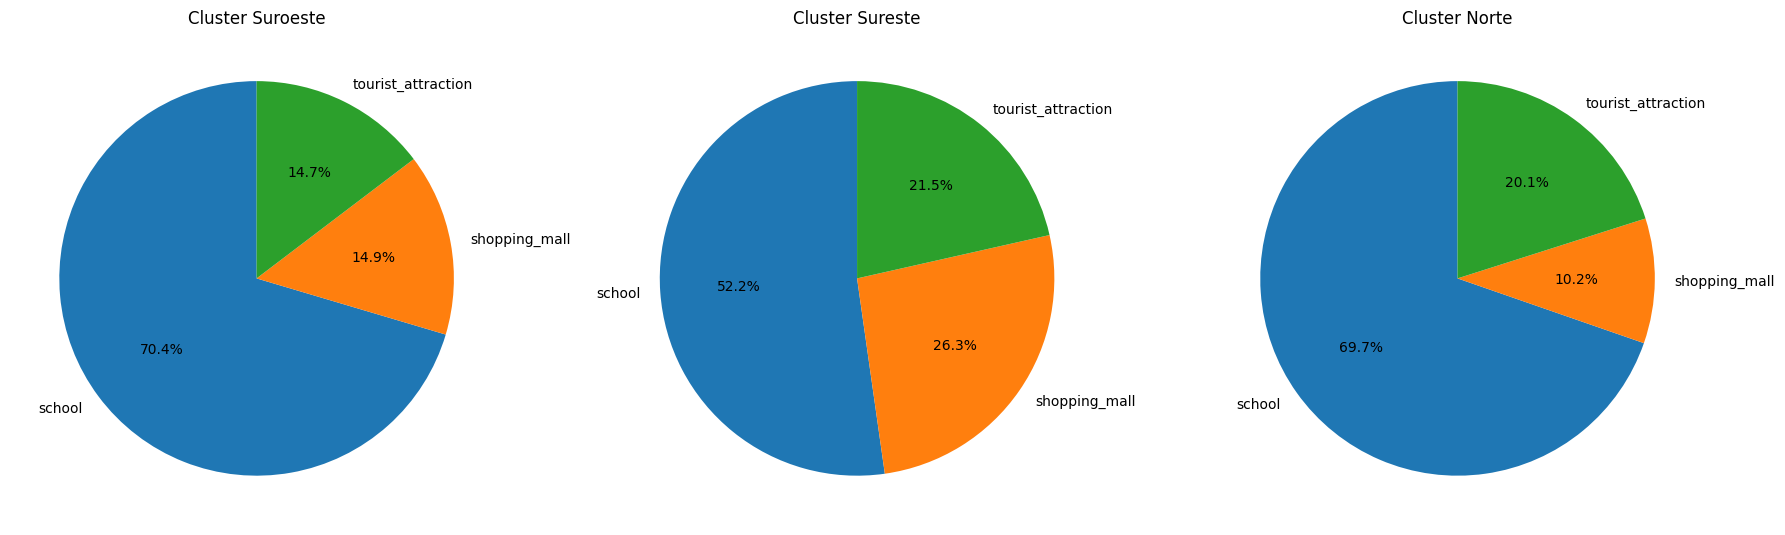

In [ ]:
# Crear una figura y un arreglo de ejes para los gráficos de tarta
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Ajustar la figura para tener 3 gráficos de tarta (uno para cada cluster)

# Bucle para crear un gráfico de tarta para cada cluster
for (cluster_id, row), ax in zip(final_counts.iterrows(), axes.flatten()):
    # Aquí cluster_id debería ser el índice numérico del cluster
    ax.pie(row, labels=row.index, autopct='%1.1f%%', startangle=90)
    # Usar cluster_names para obtener el nombre del cluster correcto
    ax.set_title(f'Cluster {cluster_names[cluster_id]}')

plt.tight_layout()
plt.show()


## Densidad de viajes (KDE) de cluster por hora

### Distribución de viajes iniciados por hora.

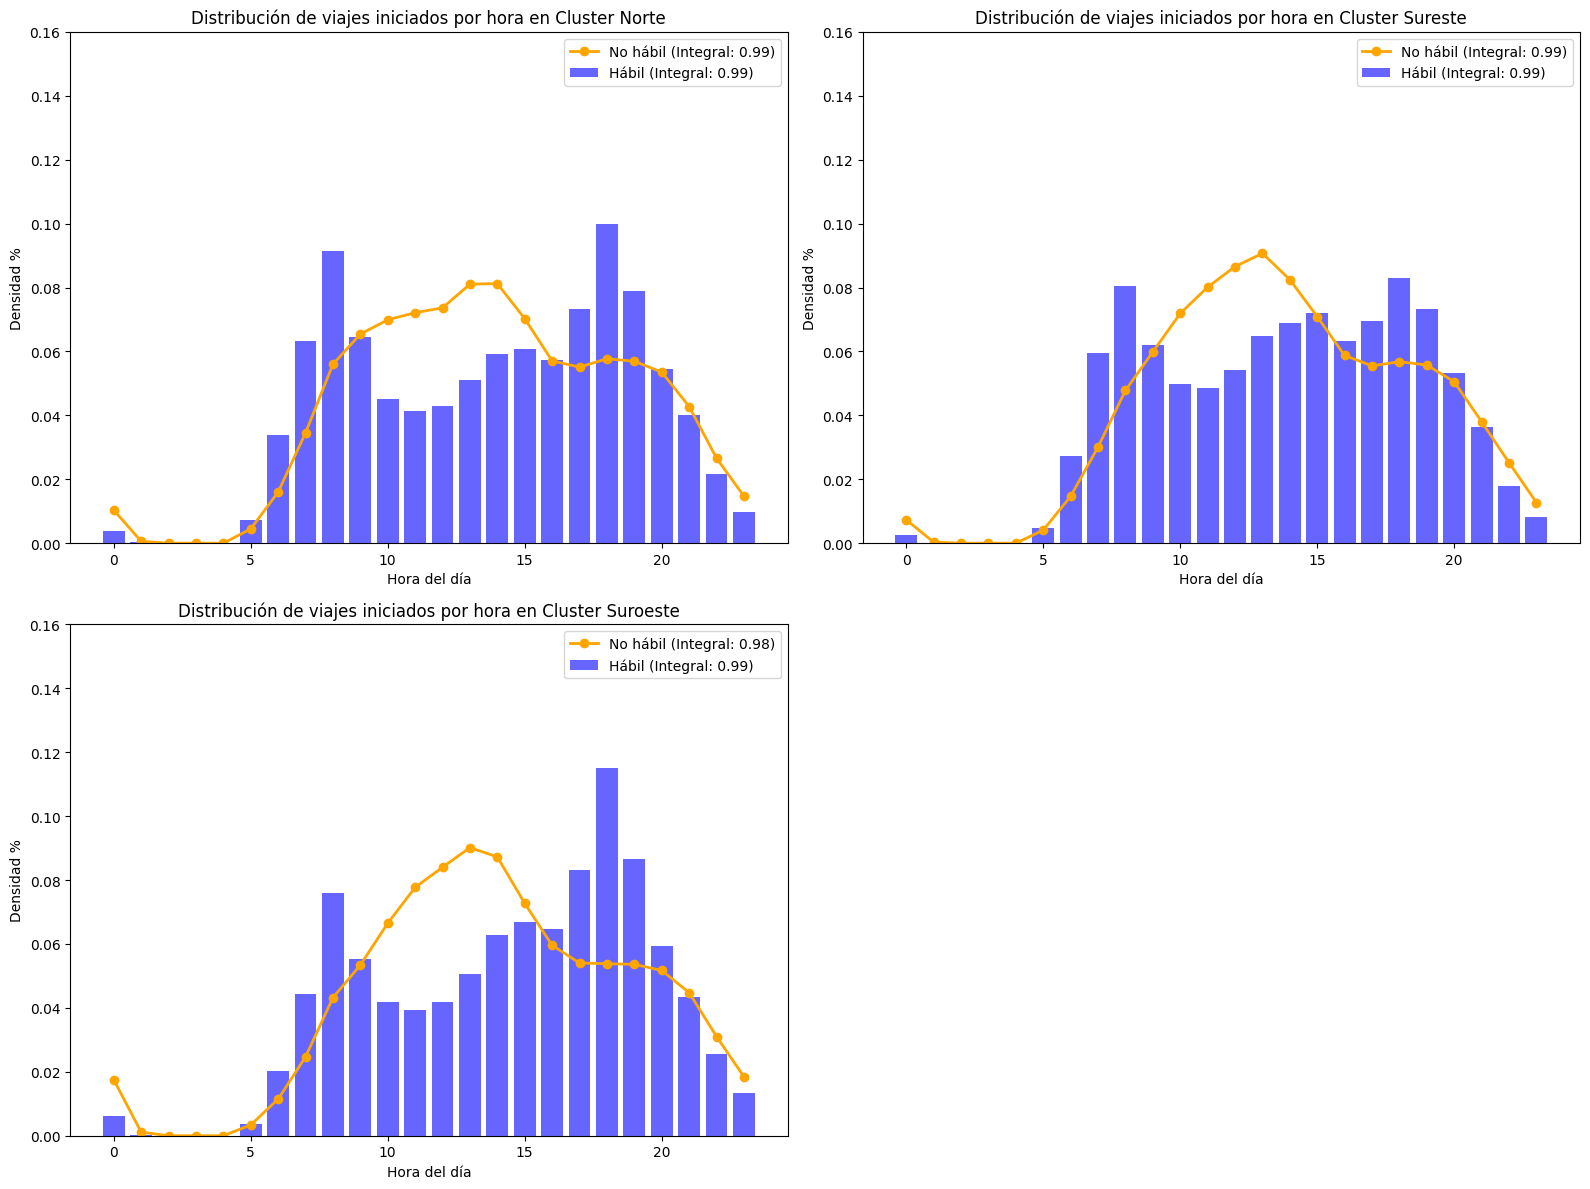

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Asegurarse que 'Inicio_del_viaje' es tipo datetime
df['Inicio_del_viaje'] = pd.to_datetime(df['Inicio_del_viaje'])
df['Hora_inicio'] = df['Inicio_del_viaje'].dt.hour

# Configurar el tamaño de los gráficos
plt.figure(figsize=(16, 12))

# Crear subplots para cada cluster
for i, cluster in enumerate(sorted(df['nom_cluster_hc_origen'].unique())):
    ax1 = plt.subplot(2, 2, i + 1)

    df_cluster = df[df['nom_cluster_hc_origen'] == cluster]
    habiles_data = df_cluster[df_cluster['Tipo_Día'] == 'Hábil']['Hora_inicio']
    no_habiles_data = df_cluster[df_cluster['Tipo_Día'] == 'No hábil']['Hora_inicio']

    # Calcular densidad para días hábiles (sin ajuste)
    habiles_density, bins = np.histogram(habiles_data, bins=np.arange(0, 25), density=True)
    integral_habiles = np.trapz(habiles_density, bins[:-1])

    # Calcular densidad para días no hábiles (sin ajuste)
    no_habiles_density, _ = np.histogram(no_habiles_data, bins=np.arange(0, 25), density=True)
    integral_no_habiles = np.trapz(no_habiles_density, bins[:-1])

    # Graficar el histograma para días hábiles
    ax1.bar(bins[:-1], habiles_density, width=0.8, alpha=0.6, color='blue', label=f'Hábil (Integral: {integral_habiles:.2f})')

    # Graficar la línea con puntos para días no hábiles
    ax1.plot(bins[:-1], no_habiles_density, color='orange', marker='o', linestyle='-', linewidth=2, label=f'No hábil (Integral: {integral_no_habiles:.2f})')

    ax1.set_title(f'Distribución de viajes iniciados por hora en Cluster {cluster}')
    ax1.set_xlabel('Hora del día')
    ax1.set_ylabel('Densidad %')
    ax1.legend()
    ax1.set_ylim(0, 0.16)  # Fijar el límite superior del eje y a 0.16 para todos los gráficos

plt.tight_layout()
plt.show()


Comprobación de que están bien representado los gráficos.

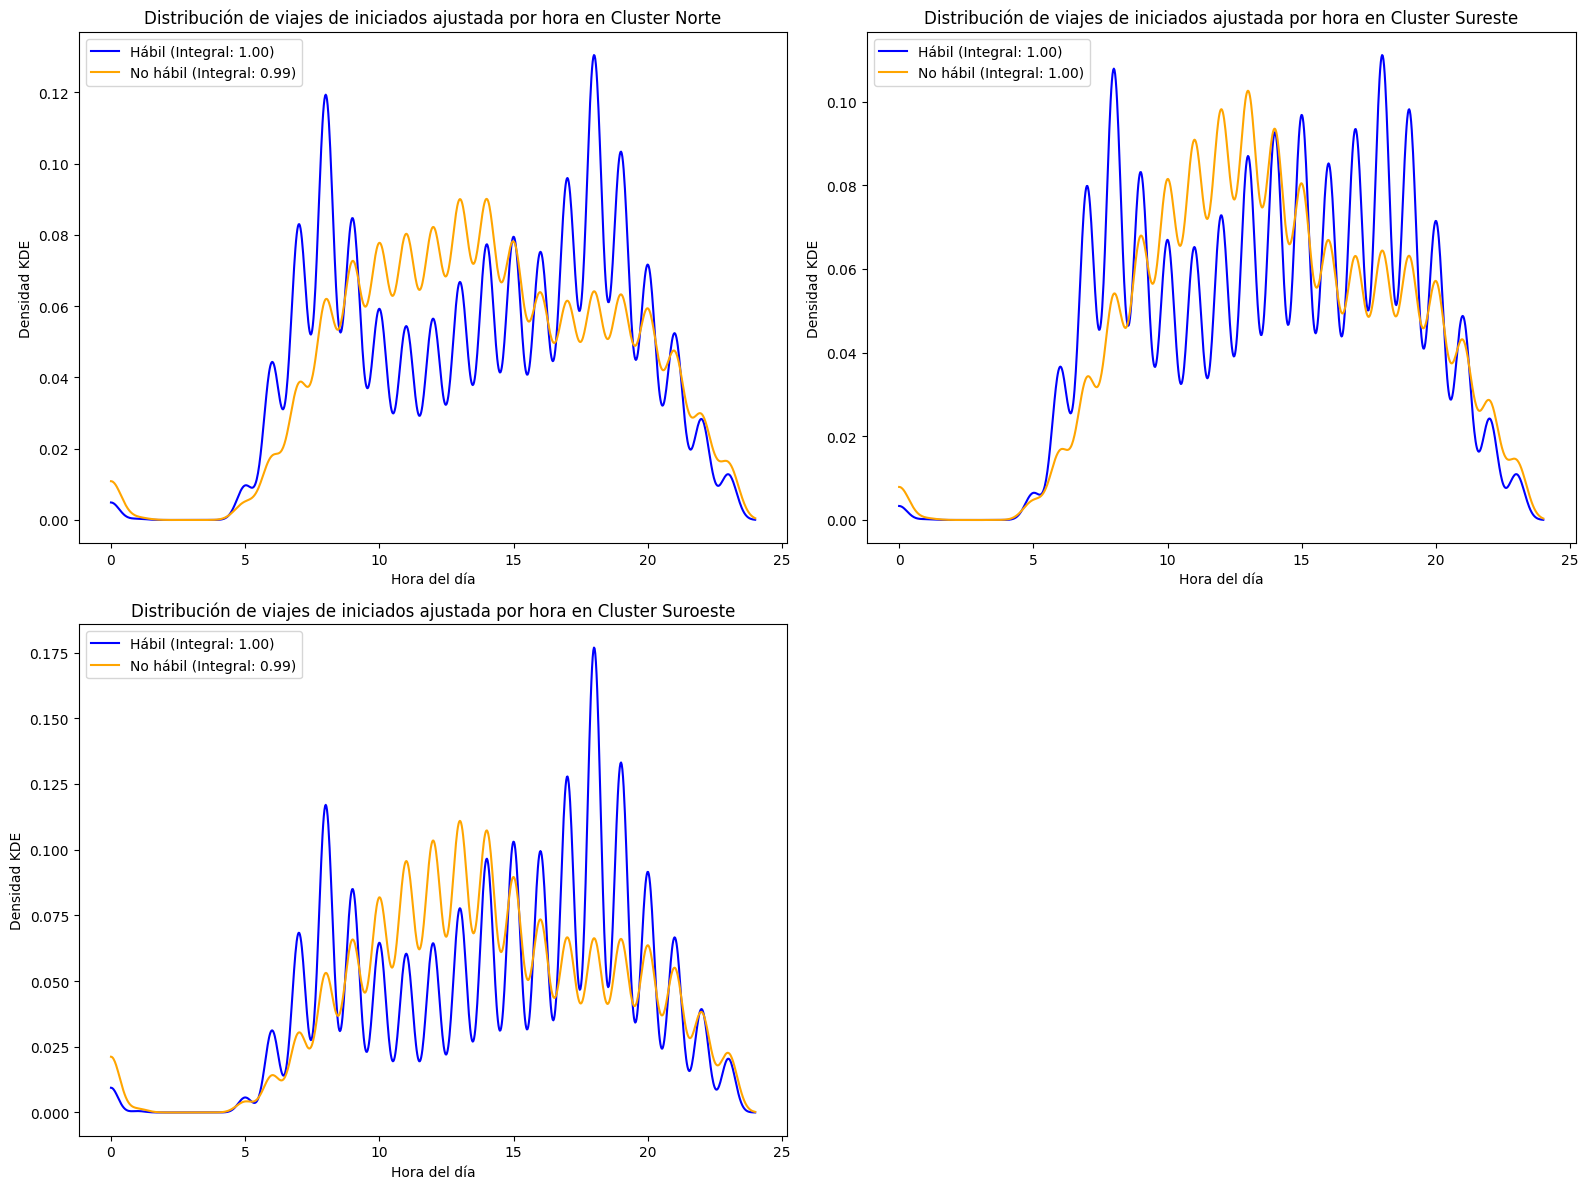

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Configuración para gráficos
plt.figure(figsize=(16, 12))  # Ajustado para mejor visualización en 2x2

for i, cluster in enumerate(sorted(df['nom_cluster_hc_origen'].unique())):
    ax = plt.subplot(2, 2, i + 1)  # Ajuste para 2x2 subplots
    df_cluster = df[df['nom_cluster_hc_origen'] == cluster]

    habiles_data = df_cluster[df_cluster['Tipo_Día'] == 'Hábil']['Hora_inicio']
    no_habiles_data = df_cluster[df_cluster['Tipo_Día'] == 'No hábil']['Hora_inicio']

    # KDE para días hábiles
    kde_habiles = gaussian_kde(habiles_data, bw_method='silverman')
    x_grid = np.linspace(0, 24, 1000)
    y_habiles = kde_habiles(x_grid)

    # KDE para días no hábiles
    kde_no_habiles = gaussian_kde(no_habiles_data, bw_method='silverman')
    y_no_habiles = kde_no_habiles(x_grid)

    # Verificación de la integral de la densidad
    integral_habiles = np.trapz(y_habiles, x_grid)
    integral_no_habiles = np.trapz(y_no_habiles, x_grid)

    ax.plot(x_grid, y_habiles, label=f'Hábil (Integral: {integral_habiles:.2f})', color='blue')
    ax.plot(x_grid, y_no_habiles, label=f'No hábil (Integral: {integral_no_habiles:.2f})', color='orange')
    ax.set_title(f'Distribución de viajes de iniciados ajustada por hora en Cluster {cluster}')
    ax.set_xlabel('Hora del día')
    ax.set_ylabel('Densidad KDE')
    ax.legend()

plt.tight_layout()
plt.show()


### Distribución de viajes finalizados por hora

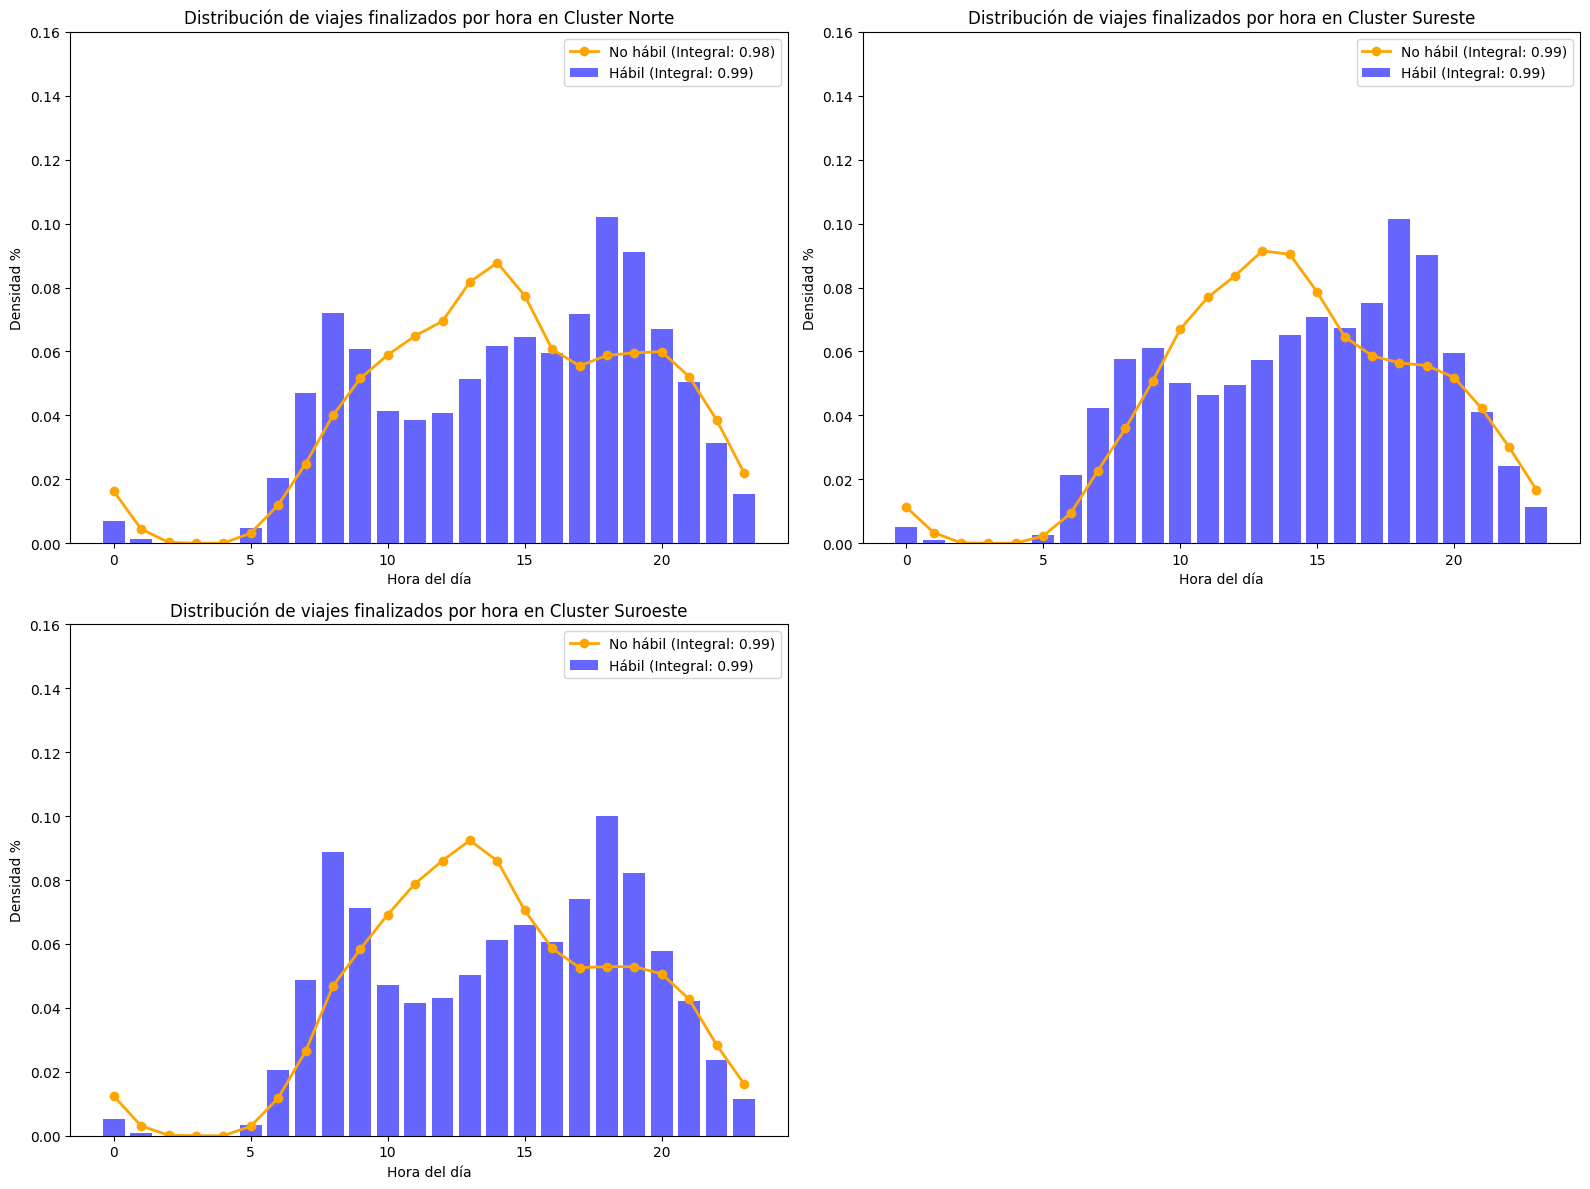

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Asegurando que 'Fin_del_viaje' sea un datetime
df['Fin_del_viaje'] = pd.to_datetime(df['Fin_del_viaje'])
df['Hora_fin'] = df['Fin_del_viaje'].dt.hour

# Configurar el tamaño de los gráficos
plt.figure(figsize=(16, 12))

# Crear subplots para cada cluster
for i, cluster in enumerate(sorted(df['nom_cluster_hc_destino'].unique())):
    ax1 = plt.subplot(2, 2, i + 1)

    df_cluster = df[df['nom_cluster_hc_destino'] == cluster]
    habiles_data = df_cluster[df_cluster['Tipo_Día'] == 'Hábil']['Hora_fin']
    no_habiles_data = df_cluster[df_cluster['Tipo_Día'] == 'No hábil']['Hora_fin']

    # Calcular densidad para días hábiles (sin ajuste)
    habiles_density, bins = np.histogram(habiles_data, bins=np.arange(0, 25), density=True)
    integral_habiles = np.trapz(habiles_density, bins[:-1])

    # Calcular densidad para días no hábiles (sin ajuste)
    no_habiles_density, _ = np.histogram(no_habiles_data, bins=np.arange(0, 25), density=True)
    integral_no_habiles = np.trapz(no_habiles_density, bins[:-1])

    # Graficar el histograma para días hábiles
    ax1.bar(bins[:-1], habiles_density, width=0.8, alpha=0.6, color='blue', label=f'Hábil (Integral: {integral_habiles:.2f})')

    # Graficar la línea con puntos para días no hábiles
    ax1.plot(bins[:-1], no_habiles_density, color='orange', marker='o', linestyle='-', linewidth=2, label=f'No hábil (Integral: {integral_no_habiles:.2f})')

    ax1.set_title(f'Distribución de viajes finalizados por hora en Cluster {cluster}')
    ax1.set_xlabel('Hora del día')
    ax1.set_ylabel('Densidad %')
    ax1.legend()
    ax1.set_ylim(0, 0.16)  # Fijar el límite superior del eje y a 0.16 para todos los gráficos

plt.tight_layout()
plt.show()

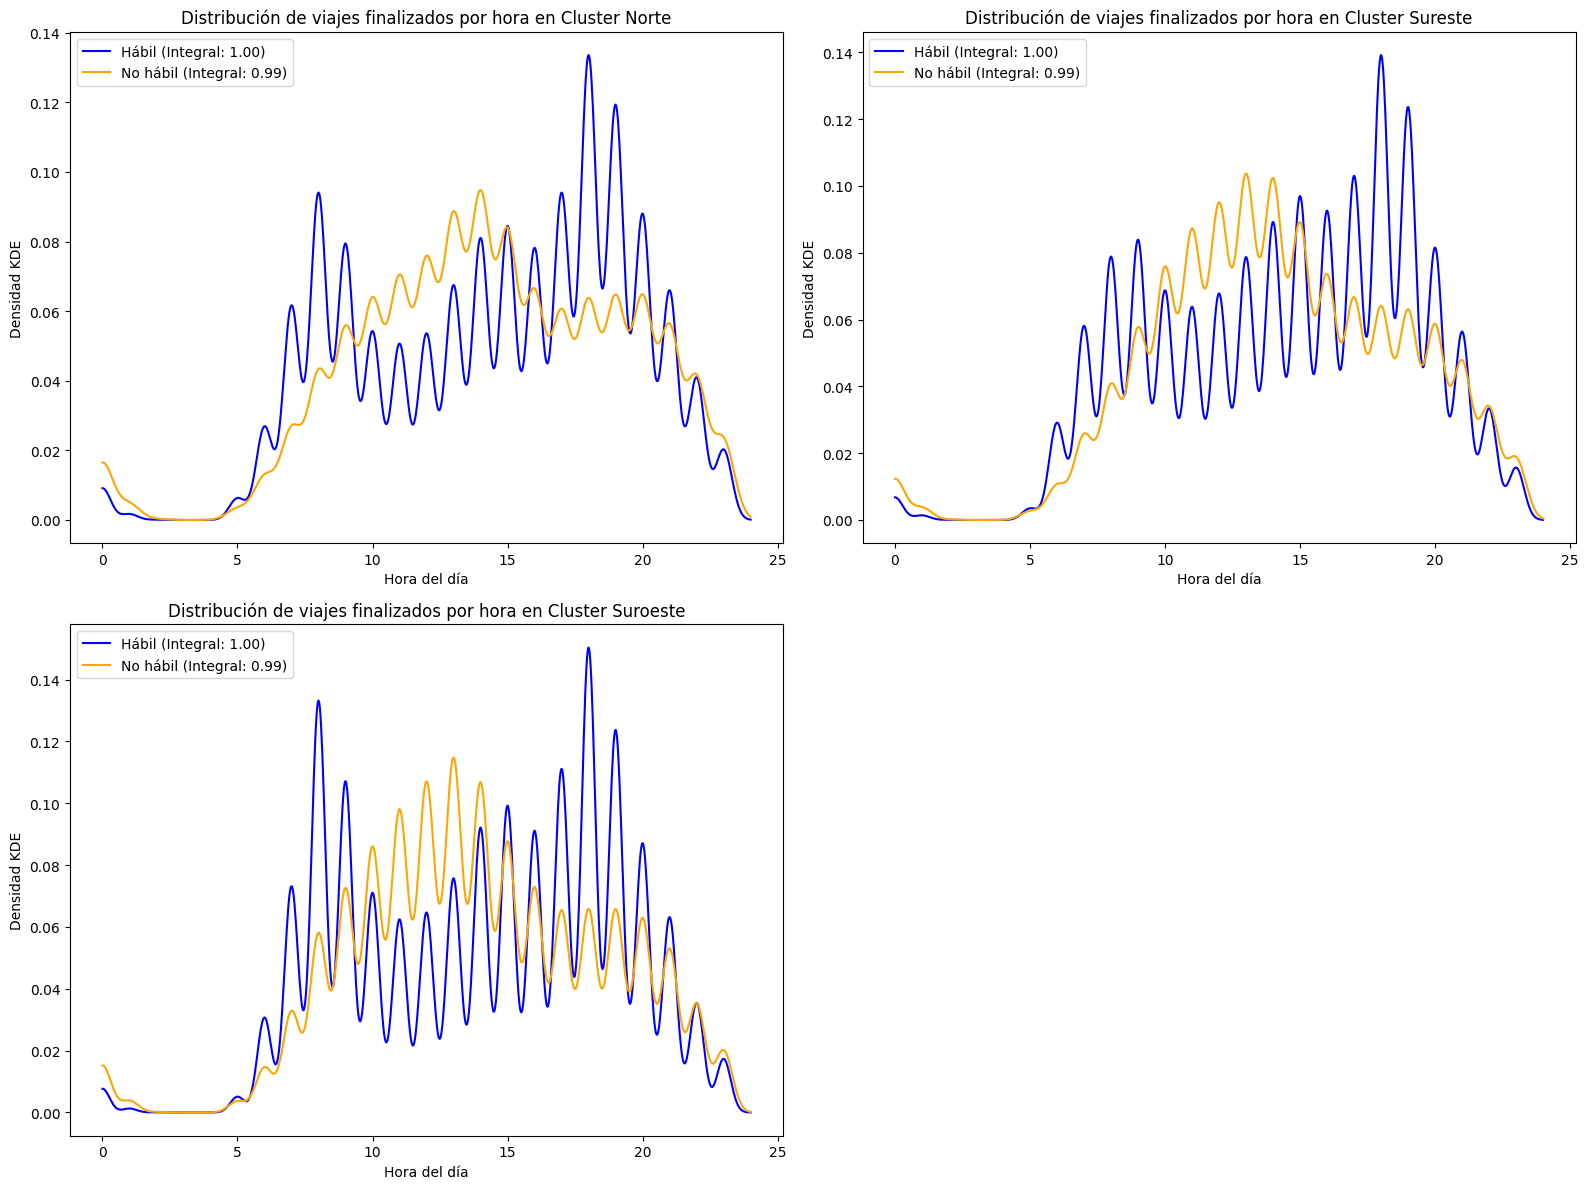

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Configuración para gráficos
plt.figure(figsize=(16, 12))  # Ajustado para mejor visualización en 2x2

for i, cluster in enumerate(sorted(df['nom_cluster_hc_destino'].unique())):
    ax = plt.subplot(2, 2, i + 1)  # Ajuste para 2x2 subplots
    df_cluster = df[df['nom_cluster_hc_destino'] == cluster]

    habiles_data = df_cluster[df_cluster['Tipo_Día'] == 'Hábil']['Hora_fin']
    no_habiles_data = df_cluster[df_cluster['Tipo_Día'] == 'No hábil']['Hora_fin']

    # KDE para días hábiles
    kde_habiles = gaussian_kde(habiles_data, bw_method='silverman')
    x_grid = np.linspace(0, 24, 1000)
    y_habiles = kde_habiles(x_grid)

    # KDE para días no hábiles
    kde_no_habiles = gaussian_kde(no_habiles_data, bw_method='silverman')
    y_no_habiles = kde_no_habiles(x_grid)

    # Verificación de la integral de la densidad
    integral_habiles = np.trapz(y_habiles, x_grid)
    integral_no_habiles = np.trapz(y_no_habiles, x_grid)

    ax.plot(x_grid, y_habiles, label=f'Hábil (Integral: {integral_habiles:.2f})', color='blue')
    ax.plot(x_grid, y_no_habiles, label=f'No hábil (Integral: {integral_no_habiles:.2f})', color='orange')
    ax.set_title(f'Distribución de viajes finalizados por hora en Cluster {cluster}')
    ax.set_xlabel('Hora del día')
    ax.set_ylabel('Densidad KDE')
    ax.legend()

plt.tight_layout()
plt.show()

## Movimientos entre clusters por la mañana y tarde.

### Configuración de horas

In [ ]:
# Definir las franjas horarias para mañana y noche
horas_mañana = range(6, 10)
horas_noche = range(17, 20)

In [ ]:
# Asegúrate de que 'Inicio_del_viaje' está en formato datetime
df['Inicio_del_viaje'] = pd.to_datetime(df['Inicio_del_viaje'])
df['Hora_inicio'] = df['Inicio_del_viaje'].dt.hour

# Crear DataFrames para mañana y noche
df_mañana = df[df['Hora_inicio'].isin(horas_mañana)]
df_noche = df[df['Hora_inicio'].isin(horas_noche)]


In [ ]:
# Crear DataFrame de movimientos para la mañana
mov_mañana = df_mañana.groupby(['cluster_hc_origen', 'cluster_hc_destino']).size().reset_index(name='Cantidad')
mov_noche = df_noche.groupby(['cluster_hc_origen', 'cluster_hc_destino']).size().reset_index(name='Cantidad')

# Imprimir para verificar
print("Movimientos en la mañana:")
print(mov_mañana.head())
print("\nMovimientos en la noche:")
print(mov_noche.head())


Movimientos en la mañana:
   cluster_hc_origen  cluster_hc_destino  Cantidad
0                  0                   0    434258
1                  0                   1     93751
2                  0                   2     79488
3                  1                   0    120523
4                  1                   1    120460

Movimientos en la noche:
   cluster_hc_origen  cluster_hc_destino  Cantidad
0                  0                   0    540344
1                  0                   1    169768
2                  0                   2    149233
3                  1                   0     90858
4                  1                   1    146953


Función para visualizaicón Sankey

In [ ]:
import plotly.graph_objects as go

def prepare_sankey_data(df, cluster_names, cluster_colors):
    # Agrupar y contar viajes
    flow_data = df.groupby(['cluster_hc_origen', 'cluster_hc_destino']).size().reset_index(name='num_viajes')

    # Preparar etiquetas y colores de nodos
    all_clusters = sorted(set(flow_data['cluster_hc_origen']) | set(flow_data['cluster_hc_destino']))
    labels = [cluster_names[cluster] for cluster in all_clusters]
    node_colors = [cluster_colors[cluster] for cluster in all_clusters]

    # Mapear índices de nodos
    cluster_indices = {cluster: i for i, cluster in enumerate(all_clusters)}

    # Listas para Sankey
    sources = [cluster_indices[src] for src in flow_data['cluster_hc_origen']]
    targets = [cluster_indices[tgt] for tgt in flow_data['cluster_hc_destino']]
    values = flow_data['num_viajes'].tolist()
    link_colors = [cluster_colors[src] for src in flow_data['cluster_hc_origen']]  # Colores de enlaces

    return labels, node_colors, sources, targets, values, link_colors

def draw_sankey(labels, node_colors, sources, targets, values, link_colors, title):
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color='black', width=0.5),
            label=labels,
            color=node_colors
        ),
        link=dict(
            source=sources,
            target=targets,
            value=values,
            color=link_colors  # Aplicar colores a los enlaces
        )
    )])

    fig.update_layout(title_text=title, font_size=10)
    fig.show()

Función para visualización en mapa

In [ ]:
import plotly.graph_objects as go

def create_cluster_map(df, centroids, title):
    # Calcular el número de viajes entre cada par de clusters
    flow_between_clusters = df.groupby(['cluster_hc_origen', 'cluster_hc_destino']).size().reset_index(name='num_viajes')
    flow_between_clusters = flow_between_clusters[flow_between_clusters['cluster_hc_origen'] != flow_between_clusters['cluster_hc_destino']]

    # Crear el gráfico con los centroides
    fig = go.Figure()

    # Agregar los puntos de los centroides al mapa, uno por cada cluster
    for cluster, color in zip(centroids['cluster_hc'].unique(), px.colors.qualitative.Plotly):
        cluster_data = centroids[centroids['cluster_hc'] == cluster]
        fig.add_trace(go.Scattermapbox(
            lat=cluster_data['latitude'],
            lon=cluster_data['longitude'],
            mode='markers',
            marker=go.scattermapbox.Marker(
                size=10,
                color=cluster_colors[cluster],  # Usar el color personalizado desde el diccionario
                opacity=0.8
            ),
            name=cluster_names[cluster],  # Usar el nombre personalizado
            text=cluster_data.index,
            hoverinfo='text'
        ))

    # Agregar líneas entre los clusters basadas en el número de viajes
    for _, row in flow_between_clusters.iterrows():
        origin = centroids.loc[centroids['cluster_hc'] == row['cluster_hc_origen']].iloc[0]
        destination = centroids.loc[centroids['cluster_hc'] == row['cluster_hc_destino']].iloc[0]
        fig.add_trace(go.Scattermapbox(
            lat=[origin['latitude'], destination['latitude']],
            lon=[origin['longitude'], destination['longitude']],
            mode='lines+text',
            line=dict(width=2, color='blue'),  # Líneas delgadas
            opacity=0.5,
            name=f"{row['num_viajes']} viajes"
        ))

    # Configuración del mapa
    fig.update_layout(
        mapbox=dict(
            style="carto-positron",
            center=dict(lat=centroids['latitude'].mean(), lon=centroids['longitude'].mean()),
            zoom=9
        ),
        showlegend=True,
        legend=dict(
            font=dict(size=10),
            itemsizing='constant',
            bgcolor='rgba(255,255,255,0.6)',
        ),
        margin={"r":0,"t":0,"l":0,"b":0},
        title=title
    )

    return fig

### Movimientos por la mañana

In [ ]:
# Crear figuras para movimientos de mañana
labels, node_colors, sources, targets, values, link_colors = prepare_sankey_data(df_mañana, cluster_names, cluster_colors)
draw_sankey(labels, node_colors, sources, targets, values, link_colors, "Movimientos entre Cluster (Mañana)")

In [ ]:
# Generar mapas para mañana
fig_mañana = create_cluster_map(df_mañana, centroids_hc, "Movimientos entre Clusters (Mañana)")

# Mostrar los gráficos
fig_mañana.show()

In [ ]:
# Ejemplo de uso con un DataFrame específico y el diccionario de nombres de clusters
generate_contingency_tables(df_mañana, cluster_names, 'Viaje_Id')

nom_cluster_hc_destino,Norte,Sureste,Suroeste
nom_cluster_hc_origen,,,
Norte,"172,772","75,373","138,649"
Sureste,"67,666","120,460","120,523"
Suroeste,"79,488","93,751","434,258"


nom_cluster_hc_destino,Norte,Sureste,Suroeste
nom_cluster_hc_origen,,,
Norte,44.67%,19.49%,35.85%
Sureste,21.92%,39.03%,39.05%
Suroeste,13.08%,15.43%,71.48%


nom_cluster_hc_destino,Norte,Sureste,Suroeste
nom_cluster_hc_origen,,,
Norte,13.26%,5.78%,10.64%
Sureste,5.19%,9.25%,9.25%
Suroeste,6.10%,7.20%,33.33%


### Movimientos por noche

In [ ]:
# Crear figuras para movimientos de noche
labels, node_colors, sources, targets, values, link_colors = prepare_sankey_data(df_noche, cluster_names, cluster_colors)
draw_sankey(labels, node_colors, sources, targets, values, link_colors, "Movimientos entre Cluster (Noche)")

In [ ]:
# Generar mapas para noche
fig_noche = create_cluster_map(df_noche, centroids_hc, "Movimientos entre Clusters (Noche)")

# Mostrar los gráficos
fig_noche.show()

In [ ]:
# Ejemplo de uso con un DataFrame específico y el diccionario de nombres de clusters
generate_contingency_tables(df_noche, cluster_names, 'Viaje_Id')

nom_cluster_hc_destino,Norte,Sureste,Suroeste
nom_cluster_hc_origen,,,
Norte,"190,620","84,843","108,954"
Sureste,"71,615","146,953","90,858"
Suroeste,"149,233","169,768","540,344"


nom_cluster_hc_destino,Norte,Sureste,Suroeste
nom_cluster_hc_origen,,,
Norte,49.59%,22.07%,28.34%
Sureste,23.14%,47.49%,29.36%
Suroeste,17.37%,19.76%,62.88%


nom_cluster_hc_destino,Norte,Sureste,Suroeste
nom_cluster_hc_origen,,,
Norte,12.27%,5.46%,7.01%
Sureste,4.61%,9.46%,5.85%
Suroeste,9.61%,10.93%,34.79%
